In [1]:
import pandas as pd

## Dataset link: https://www.kaggle.com/neuromusic/avocado-prices
df = pd.read_csv('data/avocado.csv')

print(len(df['Date']))

df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df = df.sort_index()

18249


In [3]:
df.head(3)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-01-04,51,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,51,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,51,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton


In [4]:
cal_df = df.copy()[ df['region'] == 'California']

In [5]:
ROLLING_LEN = 31
cal_df = cal_df[ cal_df['type'] == 'conventional' ]

cal_vol_min = cal_df['Total Volume'].min()
cal_vol_max = cal_df['Total Volume'].max()
cal_vol_range = cal_vol_max - cal_vol_min

cal_df['Total Volume Scaled'] = (cal_df['Total Volume'] - cal_vol_min) / cal_vol_range + 0.8

cal_df['Total Volume Scaled'].rolling(ROLLING_LEN).mean().plot()
cal_df['AveragePrice'].rolling(ROLLING_LEN).mean().plot()

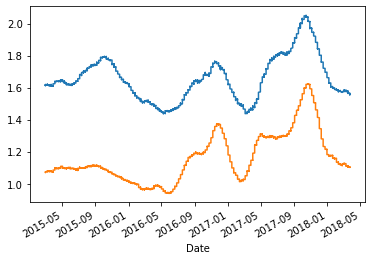

In [6]:
orgn_df = df.copy()[ df['type'] == 'organic' ]
cnvt_df = df.copy()[ df['type'] == 'conventional' ]

ROLLING_LEN = 450
orgn_df['AveragePrice'].rolling(ROLLING_LEN).mean().plot()
cnvt_df['AveragePrice'].rolling(ROLLING_LEN).mean().plot()

regional average price dataframe size: (169, 54)


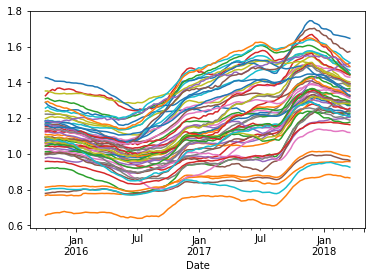

In [7]:
"""
    Split data into regional data and plot each region's 
    rolling average over time
"""

# create price by region dataframe
rgnl_avgprice_df = pd.DataFrame()
# make the dataframe conventional only
conventional_df = df.copy()[ df['type'] == 'conventional']

for region in conventional_df['region'].unique():
    # get this region's rows
    this_region = conventional_df.copy()[ conventional_df['region'] == region ]
    
    # get the average price colunm
    this_region[f'{region}_AveragePrice'] = this_region['AveragePrice']
    # also make rolling average price colunm
    this_region[f'{region}_AveragePriceMean'] = this_region['AveragePrice'].rolling(40).mean()
    
    if rgnl_avgprice_df.empty:
        rgnl_avgprice_df = this_region[[f'{region}_AveragePriceMean']]
    else:
        rgnl_avgprice_df = rgnl_avgprice_df.join(this_region[f'{region}_AveragePriceMean'])

print(f'regional average price dataframe size: {rgnl_avgprice_df.shape}')
rgnl_avgprice_df.plot(legend=False)
    

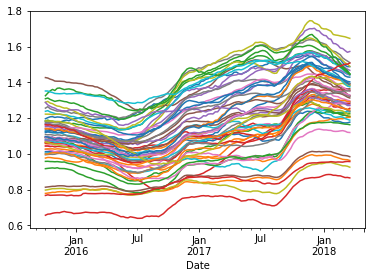

In [14]:
"""
    Using groupby, split data into regional data and plot each region's 
    rolling average over time
"""
# make the dataframe conventional only
conventional_df = df.copy()[ df['type'] == 'conventional']

region_gb = conventional_df.groupby('region')
for name, group in region_gb:
    group['AveragePrice'].rolling(40).mean().plot(legend=False)
    